Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

Data Collection and Analysis

PIMA Diabetes Dataset

In [2]:
# loading the diabetes dataset to a pandas DataFrame
diabetes_dataset = pd.read_csv('diabetes.csv') 

In [3]:
# printing the first 5 rows of the dataset
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.600,0.627,50,1
1,1,85,66,29,0,26.600,0.351,31,0
2,8,183,64,0,0,23.300,0.672,32,1
3,1,89,66,23,94,28.100,0.167,21,0
4,0,137,40,35,168,43.100,2.288,33,1


In [4]:
# number of rows and Columns in this dataset
diabetes_dataset.shape

(768, 9)

In [5]:
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [7]:
# getting the statistical measures of the data
diabetes_dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.845,3.370,0.000,1.000,3.000,6.000,17.000
Glucose,768.000,120.895,31.973,0.000,99.000,117.000,140.250,199.000
BloodPressure,768.000,69.105,19.356,0.000,62.000,72.000,80.000,122.000
SkinThickness,768.000,20.536,15.952,0.000,0.000,23.000,32.000,99.000
Insulin,768.000,79.799,115.244,0.000,0.000,30.500,127.250,846.000
BMI,768.000,31.993,7.884,0.000,27.300,32.000,36.600,67.100
DiabetesPedigreeFunction,768.000,0.472,0.331,0.078,0.244,0.372,0.626,2.420
Age,768.000,33.241,11.760,21.000,24.000,29.000,41.000,81.000
Outcome,768.000,0.349,0.477,0.000,0.000,0.000,1.000,1.000


In [8]:
# make some changes

diabetes_dataset['Insulin'].replace(0, np.nan, inplace=True)


median_insulin = diabetes_dataset['Insulin'].median()
diabetes_dataset['Insulin'].fillna(median_insulin, inplace=True)


diabetes_dataset.to_csv('guncellenmis_veri.csv', index=False)

In [26]:
diabetes_dataset=diabetes_dataset[diabetes_dataset.SkinThickness<70]
diabetes_dataset= diabetes_dataset[diabetes_dataset.Glucose>0]
diabetes_dataset=diabetes_dataset[diabetes_dataset.BloodPressure>35]
diabetes_dataset=diabetes_dataset[diabetes_dataset.BMI>0]

In [10]:
diabetes_dataset.Insulin.min()

14.0

In [11]:
diabetes_dataset['Outcome'].value_counts() 

0    473
1    247
Name: Outcome, dtype: int64

0 --> Non-Diabetic

1 --> Diabetic

In [12]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.330,111.080,71.093,20.362,128.543,30.956,0.431,31.277
1,4.935,142.611,75.453,23.061,168.182,35.236,0.560,37.287


In [13]:
# separating the data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
y = diabetes_dataset['Outcome']

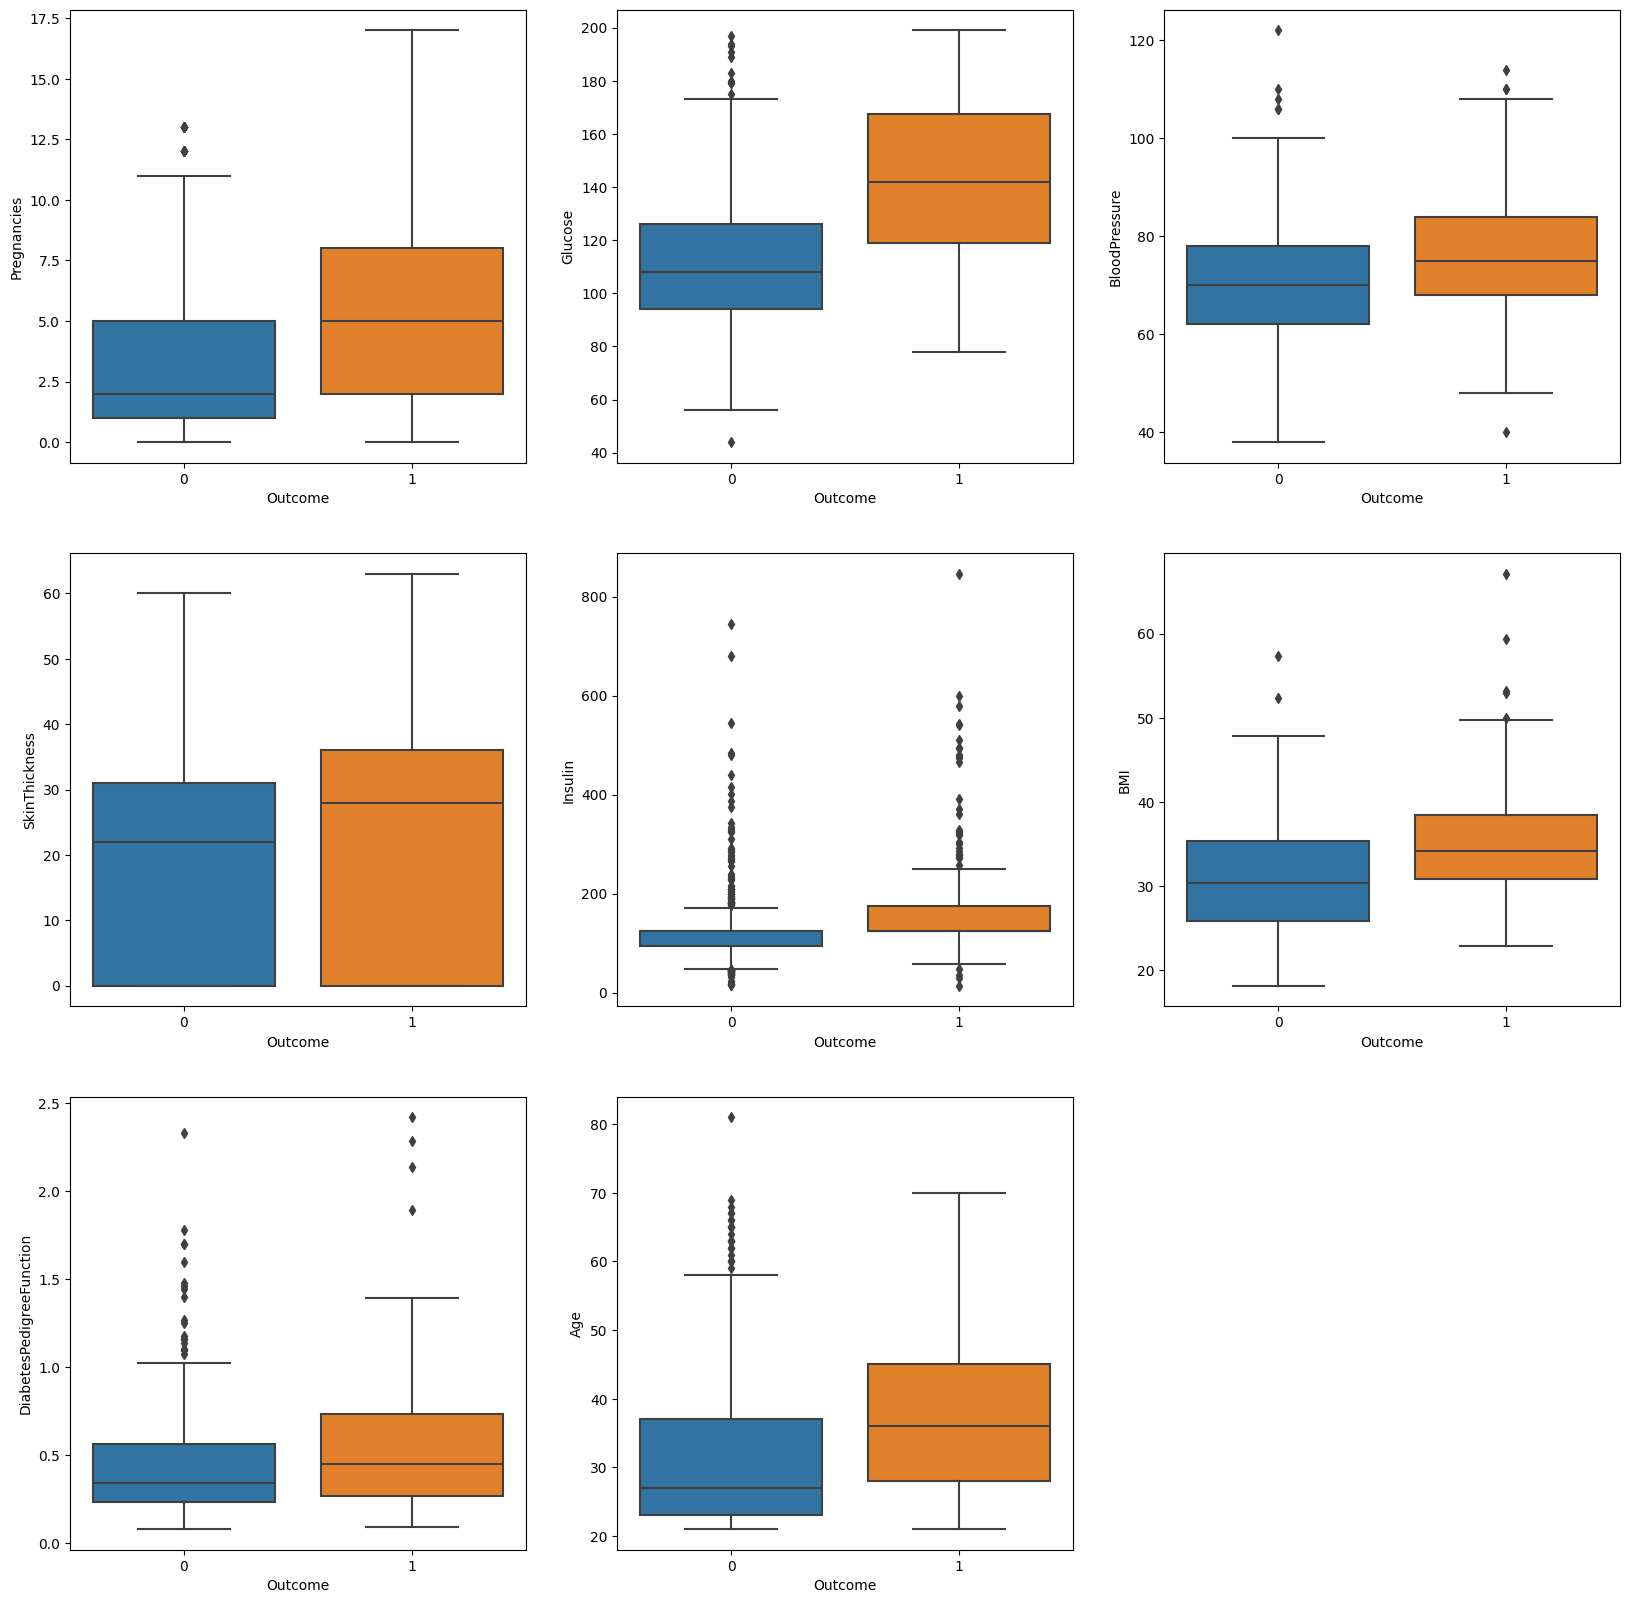

In [27]:
index = 0
plt.figure(figsize=(20,20))
for feature in diabetes_dataset.columns:
    if feature != "Outcome":
        index += 1
        plt.subplot(3,3,index)
        sns.boxplot(x='Outcome',y=feature,data=diabetes_dataset)
plt.show()

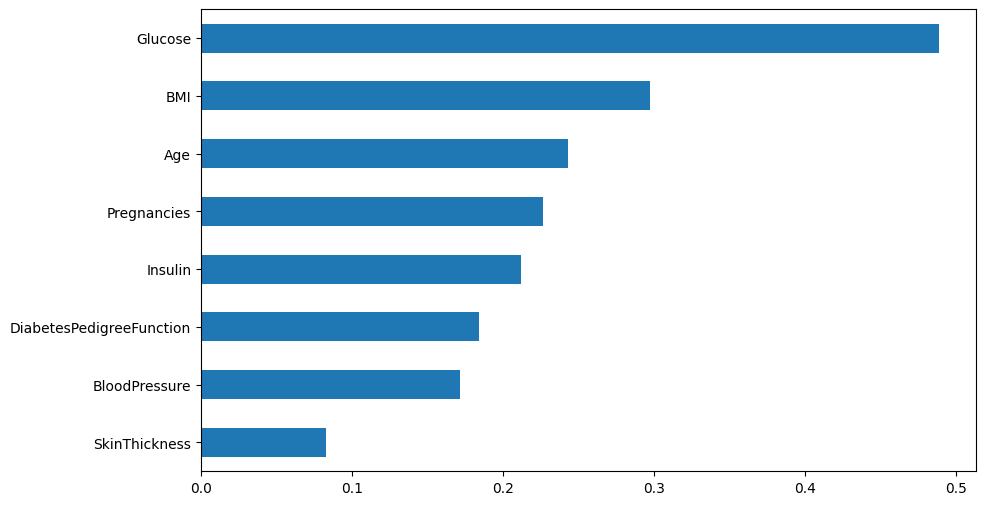

In [28]:
diabetes_dataset.corr()["Outcome"].drop("Outcome").sort_values().plot.barh()
plt.show()

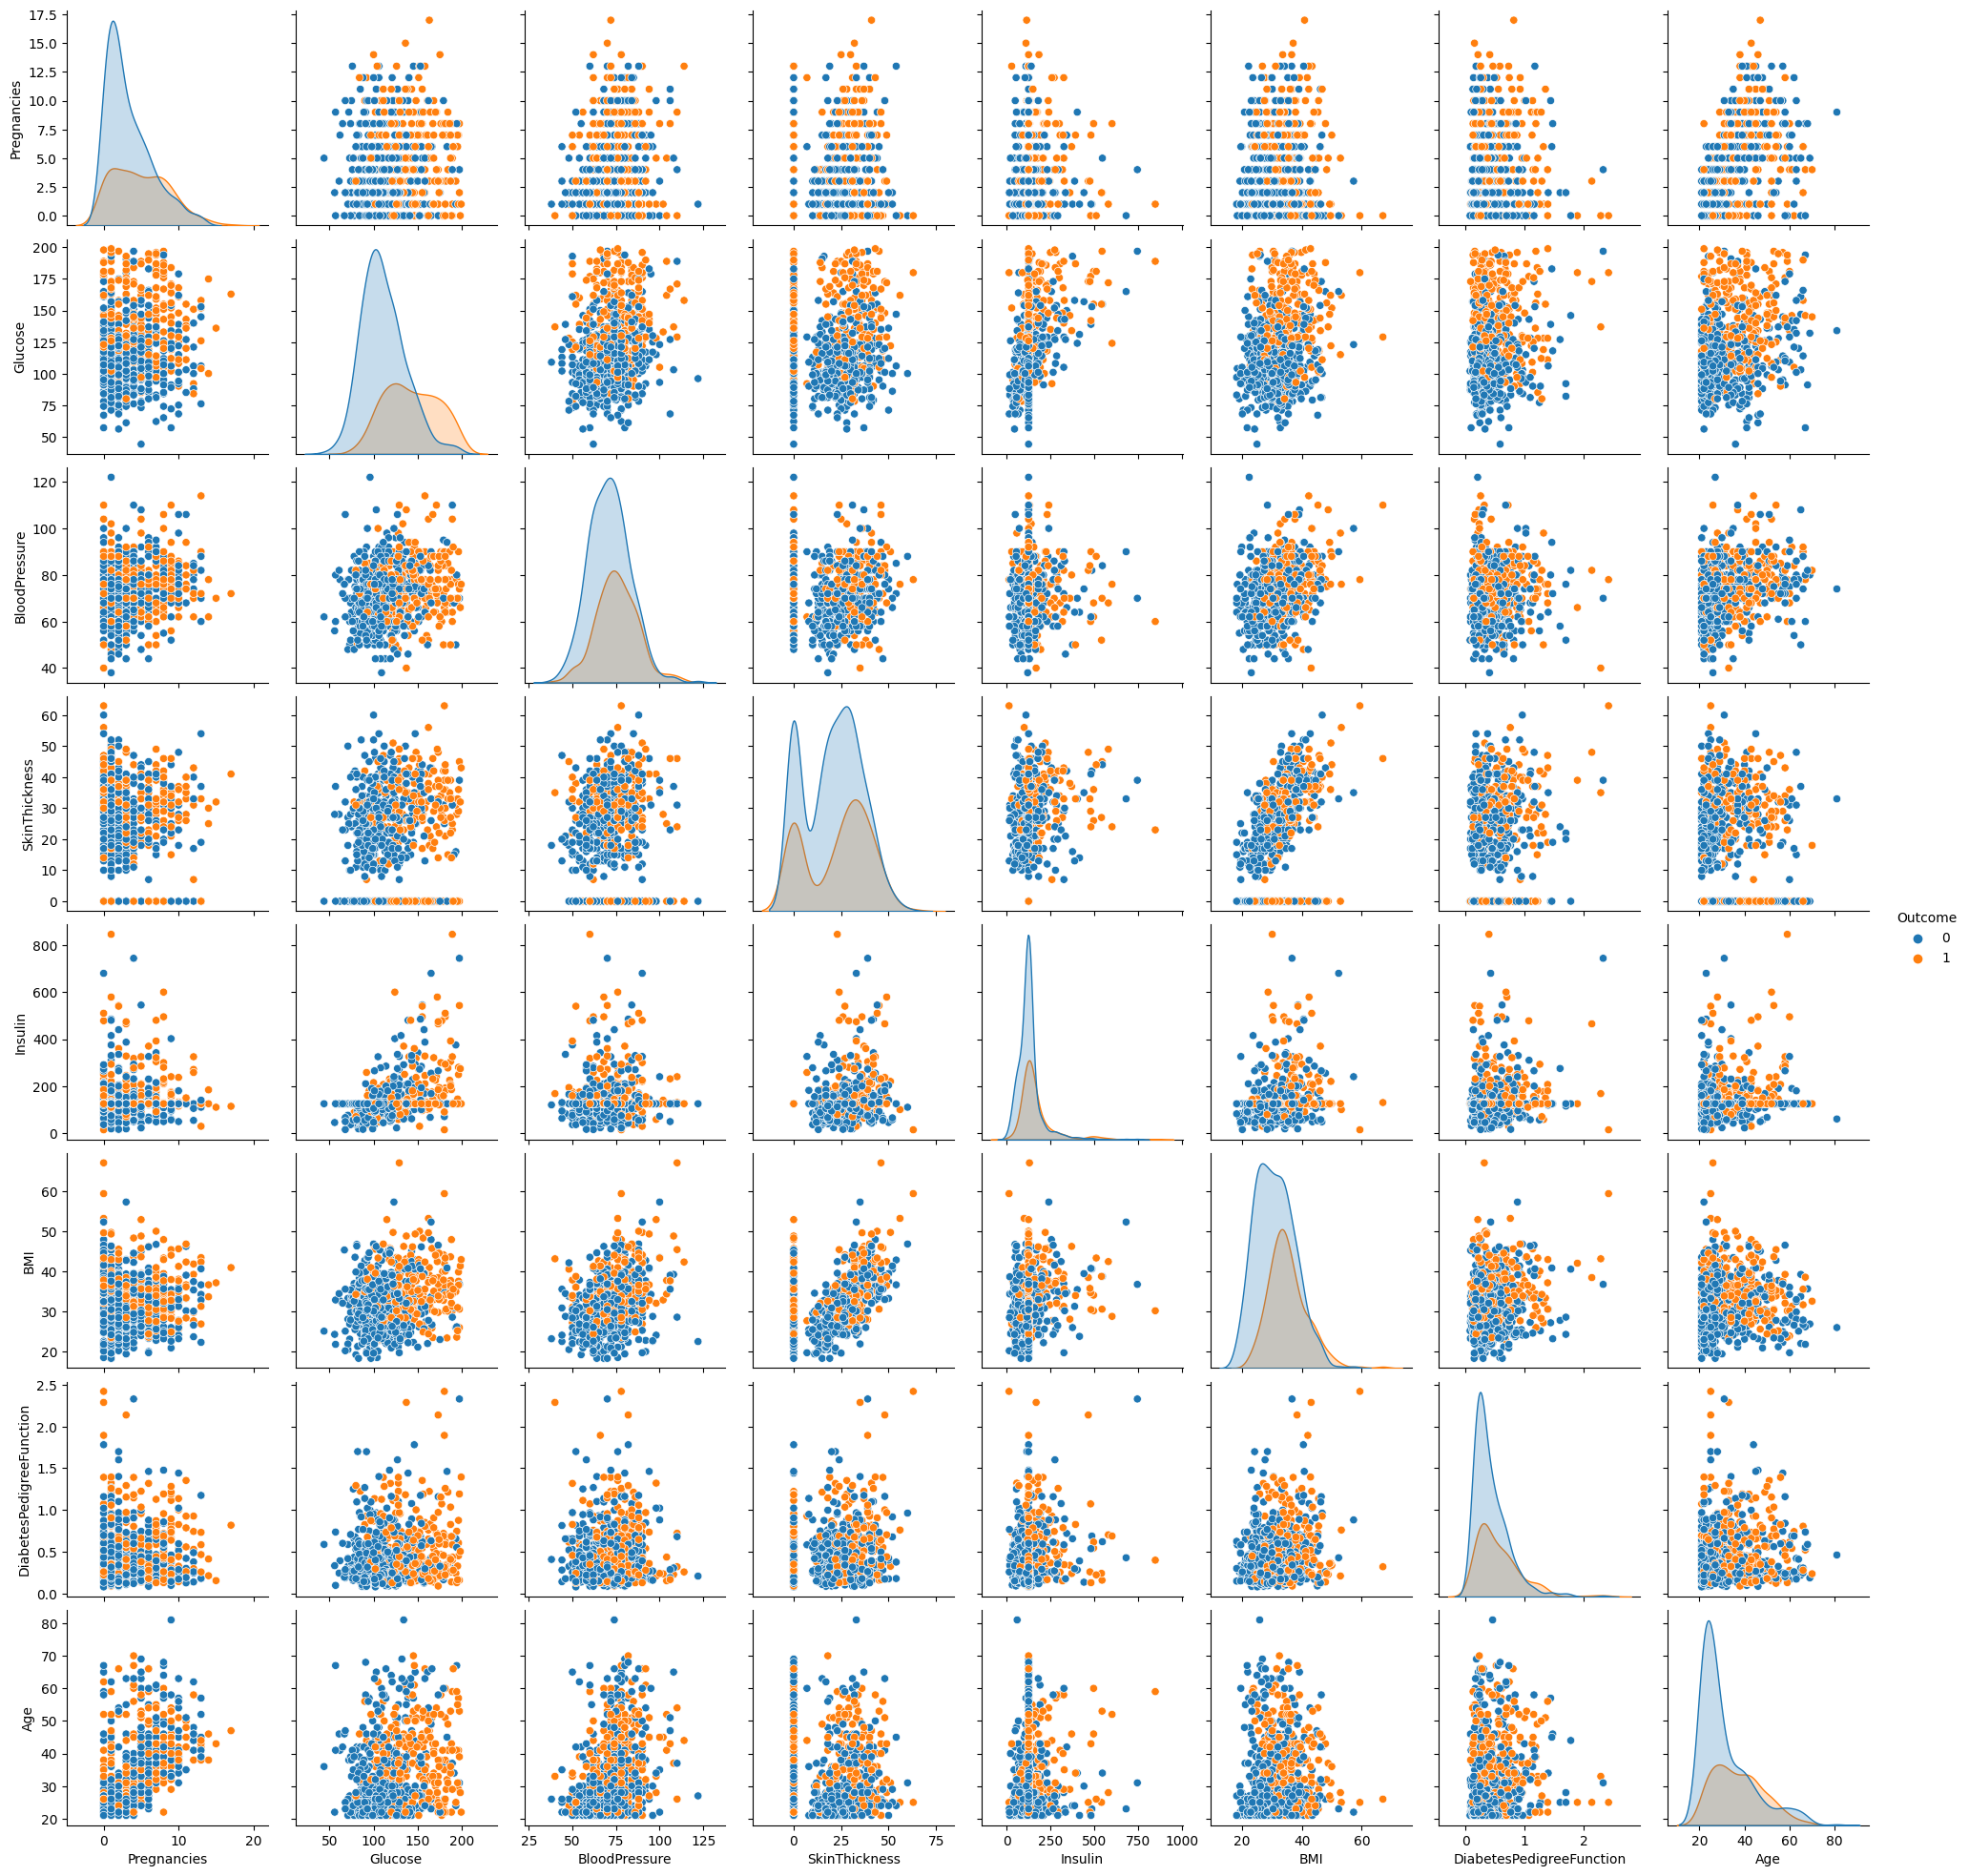

In [30]:
sns.pairplot(diabetes_dataset, hue = "Outcome");

Train Test Split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify=y, random_state=101)

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

X = diabetes_dataset.drop(columns=['Outcome'])
y = diabetes_dataset['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

models = {
    'Random Forest': RandomForestClassifier(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier()
}

cross_val_results = {}

for model_name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=5, scoring='accuracy')
    cross_val_results[model_name] = scores

for model_name, scores in cross_val_results.items():
    print(f'{model_name} Cross-Validation Results:')
    print(f'Average Accuracy: {scores.mean()}')
    print(f'Standard Deviation: {scores.std()}\n')


Random Forest Cross-Validation Results:
Average Accuracy: 0.7847222222222222
Standard Deviation: 0.028463752127665568

Support Vector Machine Cross-Validation Results:
Average Accuracy: 0.7694444444444445
Standard Deviation: 0.02299020188506507

K-Nearest Neighbors Cross-Validation Results:
Average Accuracy: 0.7486111111111111
Standard Deviation: 0.03356401659331825

Logistic Regression Cross-Validation Results:
Average Accuracy: 0.773611111111111
Standard Deviation: 0.01559023911155808

Naive Bayes Cross-Validation Results:
Average Accuracy: 0.7597222222222223
Standard Deviation: 0.014299486306926377

Decision Tree Cross-Validation Results:
Average Accuracy: 0.6749999999999999
Standard Deviation: 0.03578916312979204



In [38]:
from sklearn.model_selection import train_test_split, GridSearchCV
# Random Forest modeli için hiperparametre kombinasyonlarını belirtin
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Grid Search ile en iyi hiperparametre kombinasyonunu bulun
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_scaled, y)

# En iyi hiperparametre kombinasyonunu gösterin
print("En İyi Hiperparametre Kombinasyonu:")
print(grid_search.best_params_)

# En iyi modelin çapraz doğrulama sonuçlarını gösterin
print("En İyi Modelin Çapraz Doğrulama Sonuçları:")
print(f'Ortalama Doğruluk: {grid_search.best_score_}')

En İyi Hiperparametre Kombinasyonu:
{'max_depth': 30, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
En İyi Modelin Çapraz Doğrulama Sonuçları:
Ortalama Doğruluk: 0.788888888888889


In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training the Model

In [19]:
classifier = svm.SVC(kernel='linear')

In [20]:
#training the support vector Machine Classifier
classifier.fit(X_train, y_train)

SVC(kernel='linear')

Model Evaluation

Accuracy Score

In [21]:
# accuracy score on the training data
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

In [22]:
print('Accuracy score of the training data : ', training_data_accuracy)

Accuracy score of the training data :  0.7708333333333334


In [23]:
# accuracy score on the test data
X_test_prediction = classifier.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [24]:
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the test data :  0.7638888888888888


Making a Predictive System

In [25]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = classifier.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


Saving the trained model

In [22]:
import pickle

In [23]:
filename = 'diabetes_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [24]:
# loading the saved model
loaded_model = pickle.load(open('diabetes_model.sav', 'rb'))

In [25]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The person is not diabetic')
else:
    print('The person is diabetic')

[1]
The person is diabetic


/Users/sibel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [26]:
for column in X.columns:
    print(column)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
